In [1]:
import pandas as pd # Import the database
data = pd.read_csv("hotel_bookings.csv")
import matplotlib.pyplot as plt # Import the function to draw visualization

In [2]:
# The sum of each figure within reservation status column based on is_canceled column to identify the True component of is_canceled figure
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0.0          Check-Out             75163
1.0          Canceled              43018
             No-Show                1207
Name: count, dtype: int64

In [12]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [3]:
total_booking = len(data) # The total length of data in row
total_cancel = data['reservation_status'].value_counts()[1] # The sum of 'Canceled'(index 1) within reservation status
Cancellation_rate = round(total_cancel*100/total_booking,2) # Calculate the cancellation rate to nearest 2 decimals
print(f'The total booking number : {total_booking}')
print(f'The total cancellation number :{total_cancel}')
print(f'The total cancellation is: {Cancellation_rate} %')

The total booking number : 119394
The total cancellation number :43020
The total cancellation is: 36.03 %


/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_58109/2405055725.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_cancel = data['reservation_status'].value_counts()[1] # The sum of 'Canceled'(index 1) within reservation status


In [4]:
for hotel in data['hotel'].unique(): # Select the types of hotel within the hotel column 
    mask = data['hotel'] == hotel  # Create a mask for the current hotel
    total_booking1 = len(data[mask]) # Count the total bookings using the mask for hotel
    total_cancel1 = data[mask]['reservation_status'].value_counts()[1] # Total cancellations using the mask for hotel
    Cancellation_rate1 = round((total_cancel1 / total_booking1) * 100, 2)  # Calculate cancellation rate
    # Based on the mask figure, calculate the respective figure
    print(f'The total booking number of {hotel} : {total_booking1}')
    print(f'The total cancellation number of {hotel}:{total_cancel1}')
    print(f'The total cancellation rate of {hotel} is {Cancellation_rate1}%\n')

The total booking number of Resort Hotel : 40063
The total cancellation number of Resort Hotel:10833
The total cancellation rate of Resort Hotel is 27.04%

The total booking number of City Hotel : 79331
The total cancellation number of City Hotel:32187
The total cancellation rate of City Hotel is 40.57%



/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_58109/1942077865.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_cancel1 = data[mask]['reservation_status'].value_counts()[1] # Total cancellations using the mask for hotel
/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_58109/1942077865.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_cancel1 = data[mask]['reservation_status'].value_counts()[1] # Total cancellations using the mask for hotel


In [5]:
# To rank the arrival date month column based on is repeated guest column
data.groupby('is_repeated_guest')['arrival_date_month'].value_counts()

is_repeated_guest  arrival_date_month
0                  August                13648
                   July                  12353
                   May                   11421
                   October               10843
                   April                 10795
                   June                  10648
                   September             10305
                   March                  9359
                   February               7649
                   November               6492
                   December               6462
                   January                5530
1                  March                   426
                   February                411
                   January                 397
                   May                     366
                   December                314
                   October                 313
                   July                    301
                   November                293
                   Apr

In [6]:
# Find the number of year the data cover
data['arrival_date_year'].nunique()

3

In [7]:
# Sum the respective repetition of guests to that of cancellations and bookings
repeated_booking_sum = data.groupby('is_repeated_guest')['previous_bookings_not_canceled'].sum()[1]
non_repeated_booking_sum = data.groupby('is_repeated_guest')['previous_bookings_not_canceled'].sum()[0]
repeated_cancellation_sum = data.groupby('is_repeated_guest')['previous_cancellations'].sum()[1]
non_repeated_cancellation_sum = data.groupby('is_repeated_guest')['previous_cancellations'].sum()[0]
print(f'''Repeated Booking Sum: {repeated_booking_sum}
Non-Repeated Booking Sum: {non_repeated_booking_sum}
Total Booking = {repeated_booking_sum + non_repeated_booking_sum}
Repeated Cancellation Sum: {repeated_cancellation_sum}
Non-repeated Cancellation Sum: {non_repeated_cancellation_sum}
Total Cancellation = {repeated_cancellation_sum + non_repeated_cancellation_sum}''')# Span multiple line as it is inside triple quotes

Repeated Booking Sum: 13659
Non-Repeated Booking Sum: 2709
Total Booking = 16368
Repeated Cancellation Sum: 1790
Non-repeated Cancellation Sum: 8611
Total Cancellation = 10401


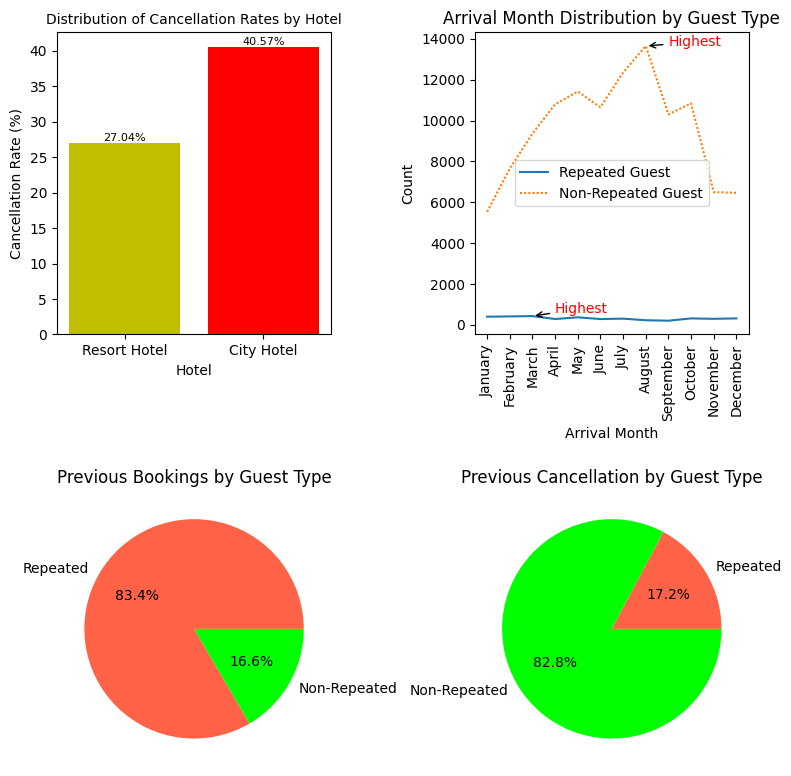

In [8]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8)) # Adjust number of figure and figsize as needed

# Bar Chart (axes[0, 0])
bar = axes[0, 0].bar(x=data['hotel'].unique(), height=[27.04, 40.57], color=['y', 'r']) # Create bar chart with xy value and color respectively
axes[0, 0].bar_label(bar, fontsize='8',labels = [f'{h:.2f}%' for h in [27.04, 40.57]]) # Label the bar with the y figure, decimal and % sign
# Labeling the xy and title.
axes[0, 0].set_xlabel('Hotel')
axes[0, 0].set_ylabel('Cancellation Rate (%)')
axes[0, 0].set_title('Distribution of Cancellation Rates by Hotel', fontsize='10')

# Line Graph (axes [0, 1])
# Define the desired order of months
month_order = ["January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"]
# Get x-axis tick positions with month order
x_tick_positions = range(len(month_order))
# Group the data and get value counts
repeated_guest_arrivals = data.groupby('is_repeated_guest')['arrival_date_month'].value_counts()[1]
non_repeated_guest_arrivals = data.groupby('is_repeated_guest')['arrival_date_month'].value_counts()[0]
# Reindex the data using the customize month order
repeated_guest_arrivals = repeated_guest_arrivals.reindex(month_order, fill_value=0)
non_repeated_guest_arrivals = non_repeated_guest_arrivals.reindex(month_order, fill_value=0)
# Plot the data on the subplot with customize feature
axes[0, 1].plot(repeated_guest_arrivals.index, repeated_guest_arrivals.values, label='Repeated Guest')
axes[0, 1].plot(non_repeated_guest_arrivals.index, non_repeated_guest_arrivals.values, label='Non-Repeated Guest',linestyle = (0,(1,1)))
# Set x-axis ticks and labels with the desired order
axes[0, 1].set_xticks(x_tick_positions)  # Set tick positions
axes[0, 1].set_xticklabels(month_order, rotation=90)  # Set tick labels with rotation
# Add legend,title and annotate with label and words.
axes[0, 1].legend()
axes[0, 1].set_title('Arrival Month Distribution by Guest Type')
axes[0, 1].set_xlabel('Arrival Month')
axes[0, 1].set_ylabel('Count')
axes[0, 1].annotate('Highest', xy=(7,13648), xytext=(8,13648), color = 'r', arrowprops=dict(arrowstyle='->'))
axes[0, 1].annotate('Highest', xy=(2,426), xytext=(3,600),color = 'r', arrowprops=dict(arrowstyle='->'))

# Pie charts (axes[1, 0], axes [1, 1])
# Define the values inside categories, booking values and cancellation values
categories =['Repeated', 'Non-Repeated']
booking_values= [repeated_booking_sum, non_repeated_booking_sum]
cancellation_values = [repeated_cancellation_sum, non_repeated_cancellation_sum]
# Adding values, labels and title with customize features for each pie chart
axes[1, 0].pie(booking_values, labels = categories, startangle = 0,autopct='%1.1f%%',colors = ['#FF6347', '#00FF00'])
axes[1, 0].set_title("Previous Bookings by Guest Type")
axes[1, 1].pie(cancellation_values, labels= categories, startangle = 0, autopct='%1.1f%%', colors = ['#FF6347','#00FF00'])
axes[1, 1].set_title ("Previous Cancellation by Guest Type")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the combined figure
plt.show()

## Business Question: What is the relationship between the loyal customers to the cancellation rate?

### Background
High cancellation rates can have huge impact on the business' revenue and resource planning. Understanding the frequency of cancellation between repeated and non-repeated guests is helpful for hotels to improve their strategies for targeted promotion and policies.

Regarding to the based cancellation, this analysis focuses on the the confirmed cancellation without taking account of no-show figure to ensure its reliability.

### Loyalty and Its Impact on Cancellation Rates
The overall cancellation rate is 36.03%, which presents a significant risk to hotel revenue. A deeper analysis shows that City Hotels have a much higher cancellation rate (40.57%) compared to Resort Hotels (27.04%), highlighting a serious issue that requires intervention.

To address this issue, the loyalty of existing guests plays a crucial role in reducing cancellations. Over the three-year period, there are 16,368 total bookings, out of which 10,401 resulted in cancellations.

Non-repeated guests are the essential customers compare to repeated customers shown in the line graph. It is shocking that non-repeated Guests contributed only 16.6% of total bookings, and their cancellation rate was disproportionately high at 82.8%.However, repeated Guests made 83.4% of total bookings, but only accounted for only 17.2% of cancellations.

### Conclusion and Recommendations

These findings proved that first-time guests are more likely to cancel than repeated guests and these hotels should focus on guest retention strategies to increase return customers. These includes introducing benefit scheme for new customers, and implementing personalized incentives for long-term customers.

Overall mark: 68

#### Business Question:
The business question is clearly identified and is well connected to the given dataset. The importance of answering the question is also explained. The findings and implications are well supported by the data.

<u>Very Good</u>

#### Data:
Based on the code and the plots, it seems that the variables selected includes hotel, is_repeated_guest and arrival_date_month. The selection of variables needs to be explicitly presented, with justifications of choosing them. Effective data filtering and grouping are used, showing good data manipulation skill.

<u>Good</u>

#### Visualization:
Four different types of plot are used, which is comprehensive for the purpose of visualization. All plots come with clear title, axis lables and ticks. Necessary annotations and legends are available as well. Most of the plots are informative and connected to the findings and implications. For the plot on the upper right, it is recommened to be replaced with frequency/ density histogram.

<u>Very Good</u>

#### Code:
The code structure is clear and easy to follow. There is no errors and necessary comments are provided. Some exploratory code can be hidden for better readability.

<u>Very Good</u>